In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
import os

%matplotlib inline

In [2]:
#path=('./test')
path_1=os.path.join(os.getcwd())
train_img=[]
train_emotion=[]
test_img=[]
test_emotion=[]
y_predicted=[]
y_pred=[]

#for train path
def fetch_train():
    path_2=os.path.join(path_1,'train')           #if 'train',then we will go to train folder ,same for test case.
    
    for i in os.listdir(path_2):                  #looping for every image in the the path_2 folder/address. 
        img_path=os.path.join(path_2,i)           #joining the path of image
        image_toarr = plt.imread(img_path)        #converting it to array 
        train_img.append(image_toarr.reshape(-1))  #appending images to list 

        if i.split(".")[1]=='happy': 
            #appending there emotion if it is happy ,then appending 1 and if sad then appending 0.
            train_emotion.append(1)
            print(i)
        elif i.split(".")[1]=='sad':
            train_emotion.append(0)
    return np.array(train_img),np.array(train_emotion)       #returning the dataset



#for test path

def fetch_test():
    path_2=os.path.join(path_1,'test')        
    
    for i in os.listdir(path_2):                       #looping for every image in the the path_2 folder/address. 
        img_path=os.path.join(path_2,i)    #joining the path of image
        image_toarr = plt.imread(img_path) #converting it to array 
        test_img.append(image_toarr.reshape(-1))   #appending images to list 

        if i.split(".")[1]=='happy':     #appending there emotion if it is happy ,then appending 1 and if sad then appending 0.
            test_emotion.append(1)
        elif i.split(".")[1]=='sad':
            test_emotion.append(0)
    return np.array(test_img),np.array(test_emotion)       #returning the dataset





x_train,y_train=fetch_train()                          #fetching the training data
x_test,y_test=fetch_test()                             #fetcing the testing data
x_size=x_train.shape[0]                                #size of training data
x_test_size=x_test.shape[0]



print("\nthe dimension of X_test  before applying pca is :",x_test.shape)               #dim (10,10201)
print("the dimension of X_train before applying pca is :",x_train.shape)             #dim (20,10201)


print("\nthe dimension of y_test that is labels of test dataset :",y_test.shape)               #dim (10,)
print("the dimension of y_train that is labels of train dataset :",y_train.shape)             #dim (20,)


#print(len(y_test))
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)

subject01.happy.gif
subject02.happy.gif
subject04.happy.gif
subject06.happy.gif
subject07.happy.gif
subject09.happy.gif
subject10.happy.gif
subject12.happy.gif
subject13.happy.gif

the dimension of X_test  before applying pca is : (10, 10201)
the dimension of X_train before applying pca is : (20, 10201)

the dimension of y_test that is labels of test dataset : (10,)
the dimension of y_train that is labels of train dataset : (20,)


In [3]:
pca = PCA(n_components=12)
pca.fit(x_train)
X_train=pca.transform(x_train)
X_test=pca.transform(x_test)
X_train=X_train.T
X_test=X_test.T

print("\nthe dimension of X_test  after applying pca is :",X_test.shape)               #dim (10,10201)
print("the dimension of X_train  after applying pca is :",X_train.shape)             #dim (20,10201)


print("\nthe dimension of y_test that is labels of test dataset :",y_test.shape)               #dim (10,)
print("the dimension of y_train that is labels of train dataset :",y_train.shape)             #dim (20,)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
#(y_test.shape)


the dimension of X_test  after applying pca is : (12, 10)
the dimension of X_train  after applying pca is : (12, 20)

the dimension of y_test that is labels of test dataset : (10,)
the dimension of y_train that is labels of train dataset : (20,)


In [4]:
class NN():
    
    def initialize_parameters(self, layerdims):
        self.layerdims = layerdims
        parameters={}
        L = len(layerdims)
        for i in range(1, L):
            W=np.random.randn( layerdims[i], layerdims[i-1]) * 0.1
            b=np.zeros( (layerdims[i],1))
            W=W/math.sqrt(1000)
            b=b/math.sqrt(1000)
            parameters["W"+str(i)] = W
            parameters["b"+str(i)] =b


        return parameters

    
    
    def L_layer_forward(self, X, parameters, layerdims):
        #      Forward propagation for L-layer

        #      [LINEAR -> RELU]*(L-1)   ->    LINEAR->SIGMOID

        #      X: Input matrix (input size/no. of features, no. of examples/BatchSize)
        #      parameters: dict of {W1,b1 ,W2,b2, ...}
        #      layerdims: Vector, no. of units in each layer  (no. of layers,)

        #     Returns:
        #      y_hat: Output of Forward Propagation
        #      caches: (A_prev,W,b,Z) *(L-1 times , of 1,2,..L layers)
    
        
        
        caches=[]
        L =  len(layerdims)-1
        A = X


        # L[0] is units for Input layer
        # [LINEAR -> RELU]*(L-1)    Forward for L-1 layers 
        for l in range(1,L):
            A_prev = A
            A, cache=self.forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)], "relu")
            caches.append(cache)

        # Forward for Last layer
        # [Linear -> softmax]
        y_hat, cache=self.forward(A, parameters["W"+str(l+1)], parameters["b"+str(l+1)], "softmax")
        caches.append(cache)

        return y_hat, caches
    
    
    
    
    def compute_cost(self,y_hat, Y):
        
        #     Computes the Loss between predicted and true label
        #     y_hat: Predicted Output (1, no. of examples)
        #     Y: Actual label vector consist of 0/1 (1, no. of examples)

        m = Y.shape[0]
        costt = np.add(  np.multiply(Y, np.log(y_hat)) ,  np.multiply(1-Y, np.log(1-y_hat))  ) 
        cost = (-1/m) * np.sum(costt, axis=1)

        return cost

    
    
    
    
    
    def L_layer_backward(self,y_hat, Y, caches, layerdims):
        
        
        #      Backward Propogation from layer L to 1
        #     y_hat:  predicted output
        #     Y:      true values
        #     caches: list of caches stored while forward Propagation
        #                 (A_prev,W,b,Z) *(L-1 times , of 1,2,..L-1 layers) with relu
        #                 (A_prev,W,b,Z) (for layer L, with sigmoid)
        #     layerdims:List having no. of units in each layer 
        #     Returns:
        #     grads: A dict containing gradient (dA_i, dW_i, db_i), this will be used while updating parameters

        AL = y_hat 
        L = len(layerdims) -1
        grads={}

        # Intializing Backpropagation

        # Compute derivation of Cost wrt A
        dAL = -(np.divide(Y,AL) - np.divide(1-Y, 1-AL))


        # Compute derivative of Lth layer (Softmax -> Linear) gradients. 
        # Inputs: (AL, Y, caches)     Outputs: (grad["dAL"], grad["dWL] , grad["dbL"])
        grads["dA"+str(L)], grads["dW"+str(L)], grads["db"+str(L)] = self.backward(dAL, caches[-1], activation="softmax")


        # Compute derivative for (1,2,..L-1)layers (relu -> Linear) gradients.
        # Inputs:(grads[dAL], caches)   Outputs:(grads(dA_i, dW_i, db_i) )


        for i in list(reversed(range(L-1))):                       

            current_cache = caches[i]

            a,b,c=self.backward(grads["dA"+str(i+2)], current_cache, activation="relu")
            grads["dA"+str(i+1)] = a
            grads["dW"+str(i+1)] = b
            grads["db"+str(i+1)] = c

        return grads

    
    
    
    
    def update_params(self,params, grads, learning_rate):
        
        #     parameters: dict of (W1,b1, W2,b2,w3,b3...)
        #     grads: Gradients of(A,W,b) stored while Backpropagation (dA,dW,db)

        #     returns: updated parameters
        
        
        # As each layer has 2 parameters (W,b)
        L=len(params) // 2

        for l in range(L):
    #         if(momentum): 
    #             m=0.9
    #         else:
    #             m=0

            params["W"+str(l+1)] = params["W"+str(l+1)] - learning_rate * grads["dW"+str(l+1)] # multiply m with params for momentum output m
            params["b"+str(l+1)] = params["b"+str(l+1)] - learning_rate * grads["db"+str(l+1)] # multiply m with params for momentum output m

        return params
    
    
    
    
    
    def forward(self,A_prev, W, b, activation):  
        #   Forward Propagation for Single layer
        #     A_prev: Activation from previous layer (size of previous layer, Batch_size)
        #         A[0] = X
        #     W: Weight matrix (size of current layer, size of previous layer)
        #     b: bias vector, (size of current layer, 1)

        #     Returns:
        #     A: Output of Single layer
        #     cache = (A_prev,W,b,Z), these will be used while backpropagation
        
        
        
        Z = np.add( np.dot(W,A_prev), b)

        # Activation Function 
        if activation== "softmax":
            #A= np.exp(Z) / np.sum(np.exp(Z), axis=0)
            A=1/(1+np.exp(-Z))

        if activation== "relu":
            A = np.maximum(0,Z)

        W=W/math.sqrt(1000)                                   #normalizing weights and bias 
        b=b/math.sqrt(1000)
        A_prev=A_prev/math.sqrt(1000)
        Z=Z/math.sqrt(1000)
        cache=(A_prev,W,b,Z)

        return A, cache 
    
    
    
    
    
    def backward(self,dA,  cache, activation):
        #     Backward propagation for single layer
        #     dz: Derivative of Cost wrt Z   (of current layer)
        #     cache: tuple of (A_prev,W,b,Z)

        #     Retuns:
        #     dW: Gradient of Cost wrt W, (having same shape as W)
        #     db: Gradient of Cost wrt b, (having same shape as b)
        #     dA_prev: Gradient of Cost wrt Activation (same shape as A_prev)
        
        
        A_prev,W,b,Z = cache
        m= A_prev.shape[1]

        # Computing derivative of Cost wrt Z

        # dA, Z, 
        if activation == "relu":
            dZ = np.array(dA, copy=True)
            dZ[Z <=0] =0

        if activation == "softmax":

            s = 1/(1+np.exp(-Z))
            dZ = dA * s * (1-s)


        # Computing derivative of Cost wrt A & W  & b
        dA_prev = np.dot(W.transpose(), dZ)
        dW = (1/m) * np.dot(dZ, A_prev.transpose())
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)


        return dA_prev, dW, db
    
    

In [5]:
def Backprop_classfication(X, Y, layer_dims, learning_rate, num_itr, parameters, initialize=True):
#      Implements a L-layer NN: 
#     [Linear->Relu] *(L-1)times  ->  [Linear->Softmax] 
    
#     X: Input data(Images) (Height*Weidth*3 , no. of examples)
#     Y: True labels, consist of 0/1      (1, no. of examples)
#     layer_dims: list, where each value is no. of units.
#     learning_rate: for parameters update
#     num_itr: no. of iterations of Gradient Descent
    
#     Returs:
#     parameters: parameters learnt during Model Training.

    model1=NN()
    costs=[]
    
    if initialize:
        parameters = model1.initialize_parameters(layer_dims)
    
   
    # Gradient Descent
    for i in range(num_itr):
        
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> Softmax
        y_hat, caches = model1.L_layer_forward(X, parameters, layer_dims)

        
        #print(y_hat.shape)
        #print(y_hat)
        # Compute Cost
        cost = model1.compute_cost(y_hat, Y)
       

        # Backward propagation
        grads = model1.L_layer_backward(y_hat, Y, caches, layer_dims)

        # Update Parameters
        parameters = model1.update_params(parameters, grads, learning_rate)
        

        if i%1 ==0:
            costs.append(cost[0])

    # Ploting the Cost
    
    plt.plot(costs)
    plt.xlabel("n iteration")
    plt.ylabel("cost")
    
    
    return parameters,cost

This is the graph when number of nodes in hidden layer is 10:
The blue line shows the cost value when the backprop algo is run for 20 iterations 
The orange line shows the cost value when the backprop algo is run for 50 iterations 
The green line shows the cost value when the backprop algo is run for 100 iterations 


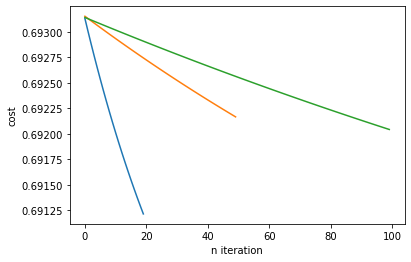

In [6]:
num=[20,50,100]
layers_dims1 = [12,10,10,2]
layers_dims2 = [12,15,15,2]
parameters,cost0=Backprop_classfication(X_train, y_train, layers_dims1, 0.05, num[0], 0, initialize=True)
parameters,cost1=Backprop_classfication(X_train, y_train, layers_dims1, 0.009, num[1], 0, initialize=True)
parameters,cost2=Backprop_classfication(X_train, y_train, layers_dims1, 0.005, num[2], 0, initialize=True)

print("This is the graph when number of nodes in hidden layer is 10:")

print("The blue line shows the cost value when the backprop algo is run for 20 iterations ")
print("The orange line shows the cost value when the backprop algo is run for 50 iterations ")
print("The green line shows the cost value when the backprop algo is run for 100 iterations ")

# print(cost0)
# print(cost1)
# print(cost2)

This is the graph when number of nodes in hidden layer is 15
The blue line shows the cost value when the backprop algo is run for 20 iterations 
The orange line shows the cost value when the backprop algo is run for 50 iterations 
The green line shows the cost value when the backprop algo is run for 100 iterations 


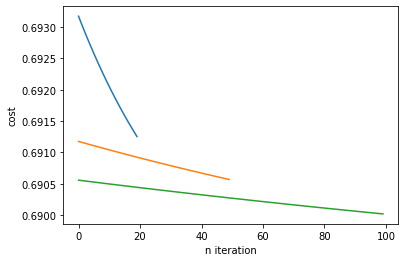

In [7]:
parameters,cost3=Backprop_classfication(X_train, y_train, layers_dims2, 0.05, num[0], 0, initialize=True)
parameters,cost4=Backprop_classfication(X_train, y_train, layers_dims2, 0.009, num[1],parameters, initialize=False)
parameters,cost5=Backprop_classfication(X_train, y_train, layers_dims2, 0.005, num[2],parameters,initialize=False)

print("This is the graph when number of nodes in hidden layer is 15")

print("The blue line shows the cost value when the backprop algo is run for 20 iterations ")
print("The orange line shows the cost value when the backprop algo is run for 50 iterations ")
print("The green line shows the cost value when the backprop algo is run for 100 iterations ")

(2, 10)
[1 1 1 1 1 1 1 0 1 0]
[0 1 1 1 0 1 1 0 1 0]
Test Data Accuracy: 0.8
Test accuracy of the model on 20 iterations and when hidden layers have nodes 10 is : 0.8


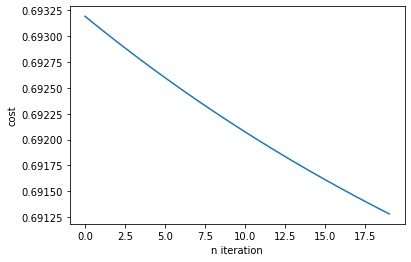

In [8]:
#prediction on test data

def predict(X,Y, parameters):
    
    model1=NN()
    m= X.shape[1]
    #print(X.shape)
    # forward propagation
    y_hat, caches = model1.L_layer_forward(X, parameters, layers_dims1)
    print(y_hat.shape)
    x=[]
    for i in range (10):
        if(y_hat[0][i]>y_hat[1][i]):
            x.append(0)
        else:
            x.append(1)
        
    #print(x)
    p=np.array(x)
    
    predicted=np.where(p>0.4888, 1, 0)
    
    print(predicted)
    print(Y)
    
    accuracy = np.sum(predicted == Y) / m
    
     
    return(accuracy, predicted)
   
    
parameters1,cost3=Backprop_classfication(X_train, y_train, layers_dims1, 0.05, num[0], 0, initialize=True)    
test_accuracy, test_predictedValues = predict(X_test,y_test, parameters1) 
print(f"Test Data Accuracy: {test_accuracy}")


print(f"Test accuracy of the model on 20 iterations and when hidden layers have nodes 10 is : {test_accuracy}")

(2, 10)
[0 0 0 0 0 1 0 0 0 0]
[0 1 1 1 0 1 1 0 1 0]
Test Data Accuracy: 0.5
Test accuracy of the model on 20 iterations and when hidden layers have nodes 15 is : 0.5


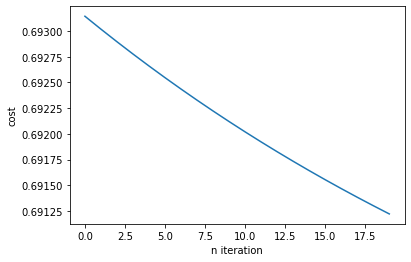

In [9]:
parameters2,cost3=Backprop_classfication(X_train, y_train, layers_dims2, 0.05, num[0], 0, initialize=True)    
test_accuracy, test_predictedValues = predict(X_test,y_test, parameters2) 
print(f"Test Data Accuracy: {test_accuracy}")


print(f"Test accuracy of the model on 20 iterations and when hidden layers have nodes 15 is : {test_accuracy}")

In [10]:
print("Note: As it is random initlization of weights hence accuracy will change on every run")


Note: As it is random initlization of weights hence accuracy will change on every run
